In [1]:
import os
import numpy as np
import pandas as pd
os.chdir("C:/Users/Muskan/Downloads")
Sales_data=pd.read_excel("Sample Product Data.xlsx")

## Importing and Pre-processing the data

In [2]:
#making a copy of the dataset so the original can stay intact
Sales_data_copy=Sales_data.copy()

In [3]:
Sales_data_copy.shape

(2170, 21)

In [4]:
#quick glance at the dataset columns types
Sales_data_copy.info()
#all column types look apt to the information they contain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SKU                        2170 non-null   object        
 1   Product_Name               2170 non-null   object        
 2   Date                       2170 non-null   datetime64[ns]
 3   itemRevenue                126 non-null    float64       
 4   itemQuantity               2170 non-null   int64         
 5   buyToDetailRate            2170 non-null   float64       
 6   productAddsToCart          2170 non-null   int64         
 7   cartToDetailRate           2170 non-null   float64       
 8   uniquePurchases            2170 non-null   int64         
 9   quantityAddedToCart        2170 non-null   int64         
 10  revenuePerItem             2170 non-null   float64       
 11  productRevenuePerPurchase  2170 non-null   float64       
 12  itemsP

In [5]:
Sales_data_copy.head()

,SKU,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,...,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
0,A1R11603GBLK00011G749,Men's Plus Black Sandal,2021-06-07,749.0,1,0.584771,0,0.550132,1,0,...,749.0,1,0,10,0.532958,100,0,120,1,0
1,A1PU9601GTAN00008G539,Men's Brown Sandals,2021-06-07,539.0,1,0.102999,1,0.411237,1,1,...,539.0,1,0,10,0.707097,100,0,227,1,0
2,A1FB9102GPBYL00007G499,Men's Blue Sandals,2021-06-07,499.0,1,0.384049,2,0.851673,1,2,...,499.0,1,0,10,0.879106,100,0,972,1,0
3,A1FB9572GPTAN00006G499,Men's Tan Formal Shoes,2021-06-07,499.0,1,0.663615,3,0.252067,1,3,...,499.0,1,0,10,0.879087,100,0,470,1,0
4,A1EV1420LBLK00007G110,Women's Black Flip-Flops,2021-06-07,658.0,2,0.659111,1,0.924743,2,1,...,329.0,1,0,10,0.368253,100,0,376,1,1


In [6]:
Sales_data_copy.tail()

,SKU,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,...,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
2165,FB9104GP-Grey-Blue,Men's Grey & Blue Sandals,2021-06-06,NaN,0,0.941969,0,0.848642,0,0,...,0.0,0,4,30,0.201389,300,0,983,3,3
2166,FB9106GP-RED,Men's Red Sandals,2021-06-06,NaN,0,0.530682,0,0.123268,0,0,...,0.0,0,3,30,0.606967,300,0,733,3,1
2167,FB9107BP-Black-Orange,Kids P-Toes Black-Orange Sandal,2021-06-06,NaN,0,0.680434,0,0.845030,0,0,...,0.0,0,2,20,0.134253,200,0,886,2,0
2168,FB9107BP-Grey-Blue,Kids Grey & Blue P-Toes Sandals,2021-06-06,NaN,0,0.970378,0,0.509889,0,0,...,0.0,0,2,10,0.066330,100,0,908,1,0
2169,R15503G42G699,Men's Black Formal Belt,2021-06-06,NaN,0,0.004284,1,0.457287,0,1,...,0.0,0,0,10,0.933676,100,0,293,1,1


#### Dropping SKU column as Product name is sufficient 

In [7]:
Sales_data_copy.drop('SKU',axis='columns',inplace=True)

In [8]:
#checking if the column was dropped
Sales_data_copy.head()

,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
0,Men's Plus Black Sandal,2021-06-07,749.0,1,0.584771,0,0.550132,1,0,749.0,749.0,1,0,10,0.532958,100,0,120,1,0
1,Men's Brown Sandals,2021-06-07,539.0,1,0.102999,1,0.411237,1,1,539.0,539.0,1,0,10,0.707097,100,0,227,1,0
2,Men's Blue Sandals,2021-06-07,499.0,1,0.384049,2,0.851673,1,2,499.0,499.0,1,0,10,0.879106,100,0,972,1,0
3,Men's Tan Formal Shoes,2021-06-07,499.0,1,0.663615,3,0.252067,1,3,499.0,499.0,1,0,10,0.879087,100,0,470,1,0
4,Women's Black Flip-Flops,2021-06-07,658.0,2,0.659111,1,0.924743,2,1,329.0,329.0,1,0,10,0.368253,100,0,376,1,1


#### Checking for missing values in the dataset

In [9]:
Sales_data_copy.isnull().sum()

Product_Name                    0
Date                            0
itemRevenue                  2044
itemQuantity                    0
buyToDetailRate                 0
productAddsToCart               0
cartToDetailRate                0
uniquePurchases                 0
quantityAddedToCart             0
revenuePerItem                  0
productRevenuePerPurchase       0
itemsPerPurchase                0
productDetailViews              0
sessions                        0
bounceRate                      0
pageViews                       0
pageviewsPerSession             0
sessionDuration                 0
users                           0
newUsers                        0
dtype: int64

In [10]:
#Item Revenue column is of type float and it has 2044 NaN 
#assuming these items were not sold hence no revenue was collected, impute them with 0 
Sales_data_copy['itemRevenue']=Sales_data_copy['itemRevenue'].replace(np.NaN,0)

In [11]:
#checking if the column still has null values
Sales_data_copy['itemRevenue'].isnull().sum()

0

In [12]:
#the last 5 rows had NaN values which are now replaced by 0
Sales_data_copy['itemRevenue'].tail()

2165    0.0
2166    0.0
2167    0.0
2168    0.0
2169    0.0
Name: itemRevenue, dtype: float64

#### Adding columns like Category based on demographic, product categories

In [13]:
#keeping the names of columns aside to use throughout
column_names=Sales_data_copy.columns

In [14]:
column_names

Index(['Product_Name', 'Date', 'itemRevenue', 'itemQuantity',
       'buyToDetailRate', 'productAddsToCart', 'cartToDetailRate',
       'uniquePurchases', 'quantityAddedToCart', 'revenuePerItem',
       'productRevenuePerPurchase', 'itemsPerPurchase', 'productDetailViews',
       'sessions', 'bounceRate', 'pageViews', 'pageviewsPerSession',
       'sessionDuration', 'users', 'newUsers'],
      dtype='object')

In [15]:
Sales_data_copy['Product_Name'].unique()

array(["Men's  Plus Black Sandal", "Men's Brown  Sandals",
       "Men's Blue  Sandals", "Men's   Tan Formal Shoes",
       "Women's  Black Flip-Flops", "Men's Blue   Flip Flops",
       'Kids Purple P-Toes Sandals', "Women's P Toes Blue Sandals",
       'Boys Tan P-Toes Casual Sandals', 'Kids Black P-Toes Sandals',
       "Men's Brown  Flip-Flops", "Women's  Black Sandals",
       "Men's Black  Flip-Flops", 'Kids White School Shoes',
       'Kids P-Toes Blue Casual Shoes', "Women's Red  Flip-Flops",
       "Women's Green   Flip Flops", "Men's Casual Blue Flip-Flops",
       "Women's Brown  Sandals", "Women's Pink Dolly Flip-Flops",
       "Women's  Pink Casual Flip Flops", "Men's  Green Flip Flops",
       'Kids P-Toes Yellow Sandal', "Men's Casual Red Flip-Flops",
       "Men's Green Walkie Flip-Flops",
       'Kids Beige Rubber Based Flip-Flops', 'Kids Red P-Toes Sandals',
       'Kids Pink P-Toes Sandal', "Women's   Maroon  Sandal",
       "Women's  Red Casual Slippers",
       'Ki

In [16]:
'''
from looking at unique values in Product Name products can be classified in 4 categories
"Men's","Women's", "Kids", "Boys"
Can add a column indicating the category of the product against each row
'''

'\nfrom looking at unique values in Product Name products can be classified in 4 categories\n"Men\'s","Women\'s", "Kids", "Boys"\nCan add a column indicating the category of the product against each row\n'

In [17]:
Sales_data_copy.head()

,Product_Name,Date,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
0,Men's Plus Black Sandal,2021-06-07,749.0,1,0.584771,0,0.550132,1,0,749.0,749.0,1,0,10,0.532958,100,0,120,1,0
1,Men's Brown Sandals,2021-06-07,539.0,1,0.102999,1,0.411237,1,1,539.0,539.0,1,0,10,0.707097,100,0,227,1,0
2,Men's Blue Sandals,2021-06-07,499.0,1,0.384049,2,0.851673,1,2,499.0,499.0,1,0,10,0.879106,100,0,972,1,0
3,Men's Tan Formal Shoes,2021-06-07,499.0,1,0.663615,3,0.252067,1,3,499.0,499.0,1,0,10,0.879087,100,0,470,1,0
4,Women's Black Flip-Flops,2021-06-07,658.0,2,0.659111,1,0.924743,2,1,329.0,329.0,1,0,10,0.368253,100,0,376,1,1


In [18]:
#splitting the Product Names so they disticnt categories can be sliced
Sales_data_copy['Category_split']=[i.split() for i in Sales_data_copy['Product_Name']]

In [19]:
Sales_data_copy['Category_split'].head()

0    [Men's, Plus, Black, Sandal]
1         [Men's, Brown, Sandals]
2          [Men's, Blue, Sandals]
3     [Men's, Tan, Formal, Shoes]
4    [Women's, Black, Flip-Flops]
Name: Category_split, dtype: object

In [20]:
Sales_data_copy['Category']=[i[0] for i in Sales_data_copy['Category_split']]

In [21]:
Sales_data_copy['Category'].head(10)

0      Men's
1      Men's
2      Men's
3      Men's
4    Women's
5      Men's
6       Kids
7    Women's
8       Boys
9       Kids
Name: Category, dtype: object

In [22]:
#making a product category column
Sales_data_copy['Product_Category']=[i[-1] for i in Sales_data_copy['Category_split']]

In [23]:
Sales_data_copy['Product_Category'].head()

0        Sandal
1       Sandals
2       Sandals
3         Shoes
4    Flip-Flops
Name: Product_Category, dtype: object

In [24]:
Sales_data_copy.iloc[:,-3:].head()

,Category_split,Category,Product_Category
0,"[Men's, Plus, Black, Sandal]",Men's,Sandal
1,"[Men's, Brown, Sandals]",Men's,Sandals
2,"[Men's, Blue, Sandals]",Men's,Sandals
3,"[Men's, Tan, Formal, Shoes]",Men's,Shoes
4,"[Women's, Black, Flip-Flops]",Women's,Flip-Flops


In [25]:
#saving the datset to an excel spreadsheet for visualizations in Power BI later 
file_name='Product_Data.xlsx'
Sales_data_copy.to_excel(file_name)

In [26]:
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Exploratory Data Analysis

### Highest revenue products

In [27]:
#subsetting the records where itemRevenue is not 0
Sales_positive_revenue=Sales_data_copy.loc[Sales_data_copy['itemRevenue']!=0]

In [28]:
Sales_positive_revenue.shape

(126, 23)

In [29]:
import matplotlib.pyplot as plt

##### 30 highest revenue collecting products

In [30]:
Sales_positive_revenue.describe()

,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.0,126.000000,126.000000,126.000000,126.0,126.000000,126.000000,126.000000
mean,361.769841,1.396825,0.510757,0.865079,0.496335,1.365079,0.888889,240.907407,245.050265,1.031746,0.0,11.587302,0.529753,115.873016,0.0,485.587302,1.158730,0.531746
std,320.845032,0.738424,0.294364,1.014717,0.287586,0.733247,1.067500,142.951718,141.565569,0.176023,0.0,4.632528,0.300776,46.325282,0.0,292.931207,0.463253,0.665571
min,77.000000,1.000000,0.002249,0.000000,0.002167,1.000000,0.000000,77.000000,77.000000,1.000000,0.0,10.000000,0.001045,100.000000,0.0,10.000000,1.000000,0.000000
25%,129.250000,1.000000,0.262570,0.000000,0.251957,1.000000,0.000000,126.000000,126.000000,1.000000,0.0,10.000000,0.256912,100.000000,0.0,236.500000,1.000000,0.000000
50%,224.500000,1.000000,0.531981,1.000000,0.498651,1.000000,1.000000,209.000000,209.000000,1.000000,0.0,10.000000,0.583011,100.000000,0.0,459.500000,1.000000,0.000000
75%,539.000000,2.000000,0.754097,1.000000,0.758365,2.000000,1.000000,329.000000,329.000000,1.000000,0.0,10.000000,0.757587,100.000000,0.0,761.500000,1.000000,1.000000
max,1518.000000,4.000000,0.998032,5.000000,0.993690,4.000000,5.000000,759.000000,759.000000,2.000000,0.0,40.000000,0.993077,400.000000,0.0,997.000000,4.000000,4.000000


<AxesSubplot:xlabel='Product_Name'>

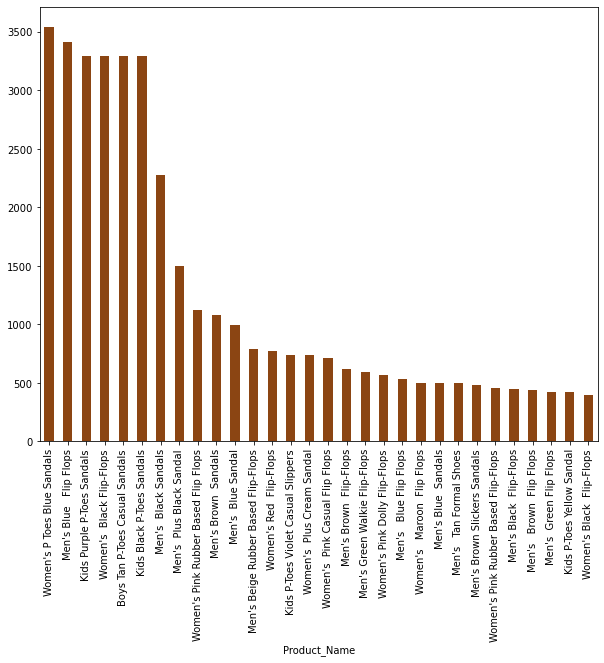

In [31]:
#plotting the 30 highest revenue collecting products
plt.figure(figsize=(10,8))
Sales_positive_revenue.groupby("Product_Name").sum().sort_values(by = "itemRevenue", ascending = False).head(30)["itemRevenue"].plot(kind = "bar", color = 'saddlebrown')


##### Revenue breakdown by Categories

In [32]:
# grouping the item Revenues by Categories and plotting a pie chart
temp_categories_df = Sales_positive_revenue.groupby("Category").sum()

In [33]:
temp_categories_df
temp_categories_df.reset_index(inplace=True)

In [34]:
y=temp_categories_df['itemRevenue']
label=temp_categories_df['Category']

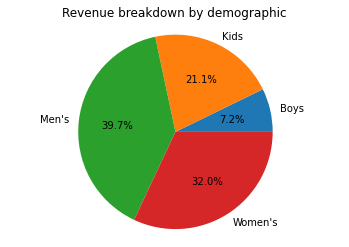

In [35]:
plt.pie(y,labels=label,autopct='%1.1f%%')
plt.title('Revenue breakdown by demographic')
plt.axis('equal')
plt.show()

In [36]:
temp_product_df = Sales_positive_revenue.groupby("Product_Category").sum()
temp_product_df.reset_index(inplace=True)
temp_product_df

,Product_Category,itemRevenue,itemQuantity,buyToDetailRate,productAddsToCart,cartToDetailRate,uniquePurchases,quantityAddedToCart,revenuePerItem,productRevenuePerPurchase,itemsPerPurchase,productDetailViews,sessions,bounceRate,pageViews,pageviewsPerSession,sessionDuration,users,newUsers
0,Belt,190.0,2,0.589633,2,1.273782,2,2,190.000000,190.000000,2,0,20,1.037830,200,0,507,2,0
1,Flip-Flops,10390.0,53,19.563073,45,17.381886,50,46,7076.000000,7469.000000,42,0,460,20.287776,4600,0,18720,46,14
2,Flops,9411.0,47,19.329824,30,18.028179,46,32,6650.333333,6779.333333,38,0,450,18.993137,4500,0,19356,45,26
3,Sandal,4219.0,11,4.633527,3,6.201338,11,3,3720.000000,3720.000000,10,0,100,4.315761,1000,0,5141,10,5
4,Sandals,18852.0,54,15.668069,22,14.522540,54,22,10197.000000,10197.000000,29,0,340,17.175801,3400,0,14185,34,17
5,Shoes,1425.0,5,2.677412,5,3.105320,5,5,1425.000000,1425.000000,5,0,50,2.259877,500,0,2464,5,3
6,Slippers,937.0,3,1.237156,1,1.793612,3,1,937.000000,937.000000,3,0,30,2.458977,300,0,556,3,1
7,flops,159.0,1,0.656711,1,0.231573,1,1,159.000000,159.000000,1,0,10,0.219778,100,0,255,1,1


### Treemap

In [37]:
temp_product=Sales_positive_revenue.groupby(['Category','Product_Category']).agg({'itemRevenue':'sum'})
temp_product

itemRevenue
Category Product_Category             
Boys     Sandals                3290.0
Kids     Flip-Flops              469.0
         Flops                    98.0
         Sandal                  617.0
         Sandals                6779.0
         Shoes                   926.0
         Slippers                738.0
Men's    Belt                    190.0
         Flip-Flops             3769.0
         Flops                  6639.0
         Sandal                 2496.0
         Sandals                4332.0
         Shoes                   499.0
         flops                   159.0
Women's  Flip-Flops             6152.0
         Flops                  2674.0
         Sandal                 1106.0
         Sandals                4451.0
         Slippers                199.0

In [38]:
import plotly.express as px
import plotly.offline as pyo

In [39]:
fig=px.treemap(Sales_positive_revenue,path=['Category','Product_Category'],values='itemRevenue')
pyo.plot(fig)


'temp-plot.html'

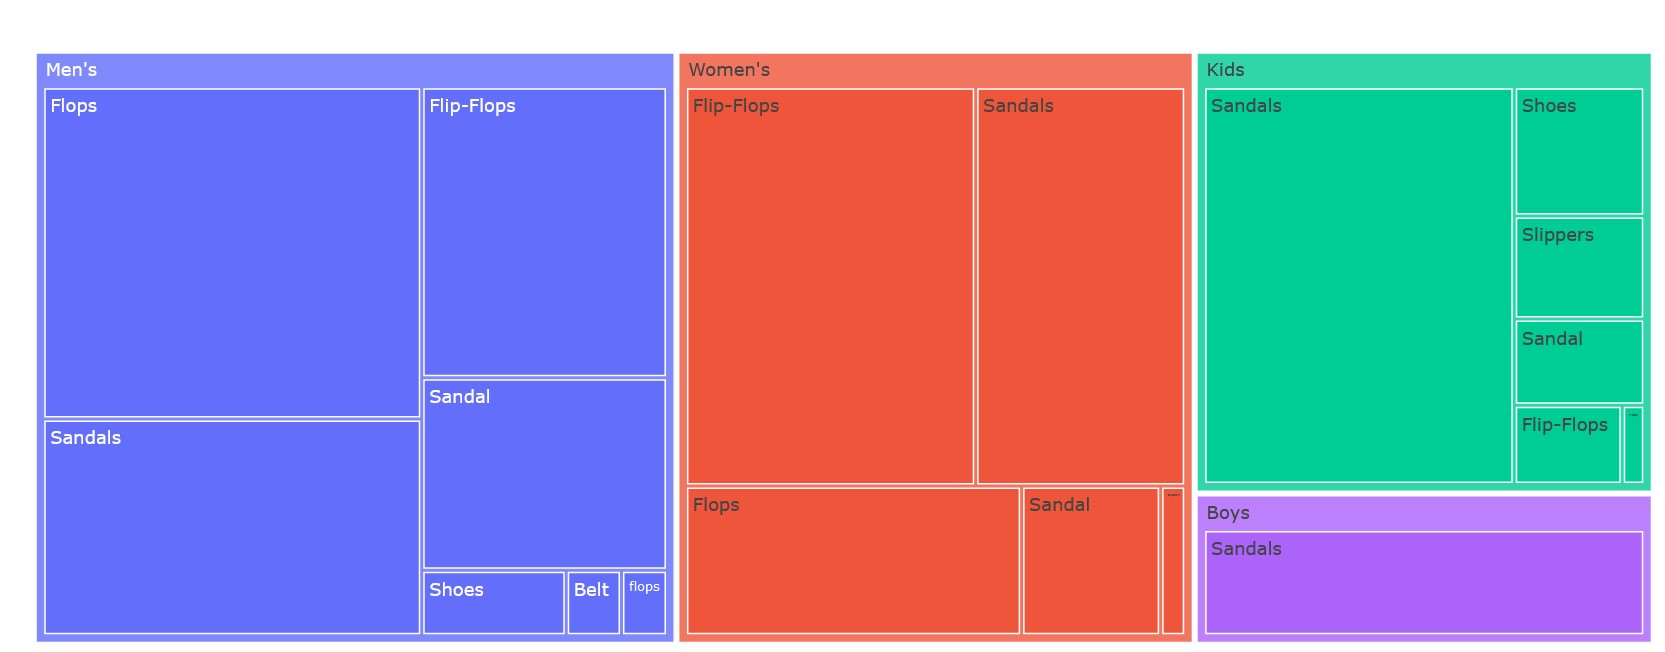

#### Revenue on different week days 
The dataset has days from 4th June 2021 to 10th June 2021

In [40]:
#getting name of the day and the number corresponding to the day of the week
Sales_positive_revenue.loc[:, "Day"] = Sales_positive_revenue['Date'].dt.day_name()
Sales_positive_revenue.loc[:, "Day_number"] = Sales_positive_revenue['Date'].dt.dayofweek

temp_line_day=Sales_positive_revenue[['Day','itemRevenue','Day_number']]
temp_line_day.head()
temp_line_day=temp_line_day.sort_values(by='Day_number')

C:\Users\Muskan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Muskan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
#0 is for Monday thus Number 6 is Sunday
temp_line_day.head()

,Day,itemRevenue,Day_number
0,Monday,749.0,0
30,Monday,199.0,0
31,Monday,159.0,0
32,Monday,149.0,0
33,Monday,145.0,0


In [42]:
temp_line_day.tail()

,Day,itemRevenue,Day_number
1895,Sunday,169.0,6
1896,Sunday,139.0,6
1897,Sunday,129.0,6
1898,Sunday,125.0,6
1900,Sunday,230.0,6


Text(0.5, 1.0, 'Revenue by Day of the week')

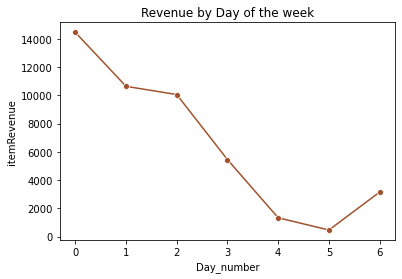

In [43]:
import seaborn as sns
sns.lineplot(x = "Day_number", y = "itemRevenue", data = temp_line_day.groupby("Day_number").sum("itemRevenue"), marker = "o", color = "sienna")
plt.title("Revenue by Day of the week")

### EDA insights
1.Women's P Toes Blue Sandals sold collected the highest revenue
Men's Blue Flip Flops collected 2nd highest revenue
Women's black Flip-Flops have collected the least revenue amongst the 30 displayed products.

2.Men's products have the greatest contribution in the revenue 

3.Sandals are the highest grossing porducts across Men's, Women's, Kids' and Boys' categories

4.Monday was  the most profitable day and lowest revenue was collected on Friday (day #5)

In [44]:
#Most sold products on Monday
Day_products_Monday=Sales_positive_revenue[Sales_positive_revenue['Day']=='Monday']
Day_products_Monday.iloc[:,-3:].tail()

,Product_Category,Day,Day_number
51,Flops,Monday,0
52,Flops,Monday,0
53,Belt,Monday,0
54,Belt,Monday,0
55,Flip-Flops,Monday,0


In [45]:
Day_products_Monday.iloc[:,0:3].sort_values(by='itemRevenue',ascending=False).head(5)

,Product_Name,Date,itemRevenue
0,Men's Plus Black Sandal,2021-06-07,749.0
4,Women's Black Flip-Flops,2021-06-07,658.0
5,Men's Blue Flip Flops,2021-06-07,658.0
6,Kids Purple P-Toes Sandals,2021-06-07,658.0
7,Women's P Toes Blue Sandals,2021-06-07,658.0


##### Men's Plus Black Sandals were the highest grossing product on Mondays. Thus Black Sandal  inventory should be stocked on time always

In [46]:
#Least sold products on Friday
Products_Friday=Sales_positive_revenue[Sales_positive_revenue['Day']=='Friday']

In [47]:
Products_Friday.iloc[:,0:3].sort_values(by='itemRevenue',ascending=True).head(5)

,Product_Name,Date,itemRevenue
1417,Kids Black P-Toes Flip-Flops,2021-06-04,95.0
1416,Women's Pink Rubber Based Flip-Flops,2021-06-04,115.0
1415,Men's Casual Blue Flip-Flops,2021-06-04,119.0
1414,Men's Beige Rubber Based Flip-Flops,2021-06-04,262.0
1413,Men's Plus Black Sandal,2021-06-04,749.0


##### Kids Black P-Toes Flip Flops are the least selling product on the least selling day and either need a strong marketing campaign or need a cost benefit analysis
Men's Plus Black Sandal sold for the same amount on Friday as well as Monday, thus is a consistent sell 

In [48]:
Sales_data_copy.columns

Index(['Product_Name', 'Date', 'itemRevenue', 'itemQuantity',
       'buyToDetailRate', 'productAddsToCart', 'cartToDetailRate',
       'uniquePurchases', 'quantityAddedToCart', 'revenuePerItem',
       'productRevenuePerPurchase', 'itemsPerPurchase', 'productDetailViews',
       'sessions', 'bounceRate', 'pageViews', 'pageviewsPerSession',
       'sessionDuration', 'users', 'newUsers', 'Category_split', 'Category',
       'Product_Category'],
      dtype='object')

##### What are the top products in terms of being added to the cart, sold directly, and gain the most number of views on details

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, "Men's Black  Flip-Flops"),
  Text(1, 0, "Men's Grey  Sandals"),
  Text(2, 0, "Men's Brown  Flip-Flops"),
  Text(3, 0, "Women's Blue  Flip-Flops"),
  Text(4, 0, "Men's Brown  Formal Belt")])

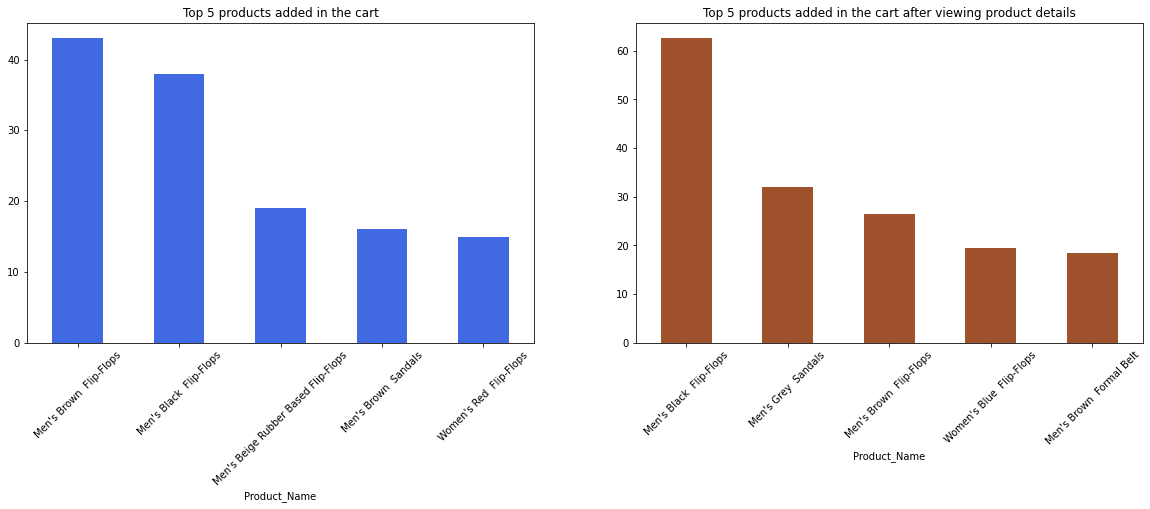

In [49]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
Sales_data_copy.groupby('Product_Name').sum().sort_values(by="productAddsToCart",ascending=False).head(5)["productAddsToCart"].plot(kind = "bar",color='royalblue')
plt.title("Top 5 products added in the cart")
plt.xticks(rotation=45)
plt.subplot(3,2,2)
Sales_data_copy.groupby('Product_Name').sum().sort_values(by="cartToDetailRate",ascending=False).head(5)["cartToDetailRate"].plot(kind = "bar",color='sienna')
plt.title("Top 5 products added in the cart after viewing product details")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, "Men's Black  Flip-Flops"),
  Text(1, 0, "Men's Grey  Sandals"),
  Text(2, 0, "Men's Blue  Flip-Flops"),
  Text(3, 0, "Men's Brown  Flip-Flops"),
  Text(4, 0, "Men's   Brown Sandal")])

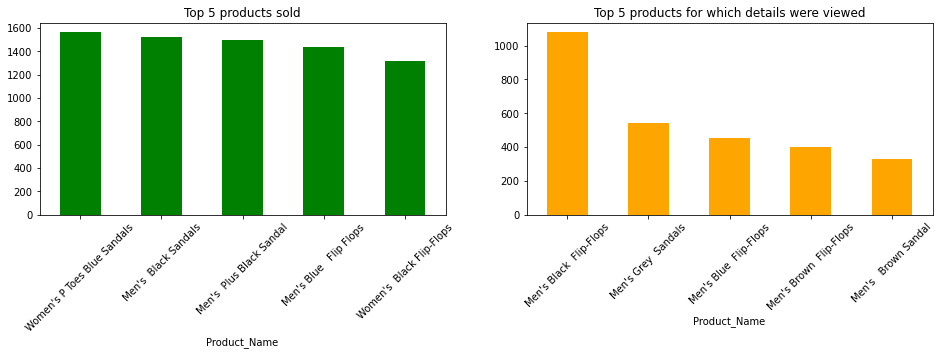

In [50]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
Sales_data_copy.groupby('Product_Name').sum().sort_values(by="revenuePerItem",ascending=False).head(5)["revenuePerItem"].plot(kind = "bar",color='green')
plt.title("Top 5 products sold")
plt.xticks(rotation=45)
plt.subplot(3,2,2)
Sales_data_copy.groupby('Product_Name').sum().sort_values(by="productDetailViews",ascending=False).head(5)["productDetailViews"].plot(kind = "bar",color='orange')
plt.title("Top 5 products for which details were viewed")
plt.xticks(rotation=45)



##### EDA insight
Men's Brown Flip Flops are the most frequently added products in shopping carts, but Men's Black Flip Flops have gained the most number of detailed views. This could mean there maybe more size options available in balck flip flops for which product details need to be checked. 

Meanwhile, Women's P Toes Blue Sandals collected the most revenue even though they were not amongst the top added products in carts. This could mean they are a lone direct order via 'Buy Now' feature. 

Men's Black Flip Flops still remain the most viewed product. 

### KPIs

##### KPI#1  Customer Retention by bounce rate
Do new users explore the site further than the first page as compared to existing users?

In [51]:
#Taking out the existing users from all users and comparing with new users
Existing_new_users=Sales_data_copy[['users','newUsers','bounceRate']]
Existing_new_users['Existing_Users']=Sales_data_copy['users']-Sales_data_copy['newUsers']
Existing_new_users.head()

<ipython-input-51-6df60dc87dea>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,users,newUsers,bounceRate,Existing_Users
0,1,0,0.532958,1
1,1,0,0.707097,1
2,1,0,0.879106,1
3,1,0,0.879087,1
4,1,1,0.368253,0


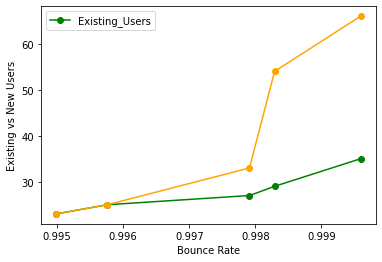

In [52]:
fig,ax=plt.subplots()
ax.plot(Existing_new_users['bounceRate'].sort_values(ascending=False).head(5),Existing_new_users['Existing_Users'].sort_values(ascending=False).head(5), marker="o",color='g')
ax.set_xlabel("Bounce Rate")
ax.set_ylabel("Existing vs New Users")
ax.plot(Sales_data_copy['bounceRate'].sort_values(ascending=False).head(5), Sales_data_copy['newUsers'].sort_values(ascending=False).head(5), marker="o",color='orange')
ax.legend(['Existing_Users'])
plt.show()

#### KPI insight 

The bounce rate of first time users is comparitvely high. This could mean that the marketing campaign on source could have targeted wrong audience,for whom product(s) were irrelevant

Insight: session duration 
How many seconds or minutes do people usually spend on the website?

In [53]:
Sales_data_copy.columns

Index(['Product_Name', 'Date', 'itemRevenue', 'itemQuantity',
       'buyToDetailRate', 'productAddsToCart', 'cartToDetailRate',
       'uniquePurchases', 'quantityAddedToCart', 'revenuePerItem',
       'productRevenuePerPurchase', 'itemsPerPurchase', 'productDetailViews',
       'sessions', 'bounceRate', 'pageViews', 'pageviewsPerSession',
       'sessionDuration', 'users', 'newUsers', 'Category_split', 'Category',
       'Product_Category'],
      dtype='object')

In [553]:
Sales_data_copy['sessionDuration'].describe()

count    2170.000000
mean      501.467742
std       290.877658
min         1.000000
25%       250.250000
50%       501.000000
75%       755.000000
max      1000.000000
Name: sessionDuration, dtype: float64

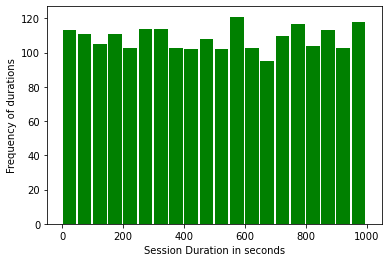

In [54]:
plt.hist(Sales_data_copy['sessionDuration'],bins=20,width=45,color=['green'])
plt.xlabel("Session Duration in seconds")
plt.ylabel("Frequency of durations")
plt.show()

##### EDA Insight:
The most common session duration on the site is around 9-10 mins

##### KPI #2 Inventory Turnover by Product
Which product are we turning from inventory to cash the fastest?

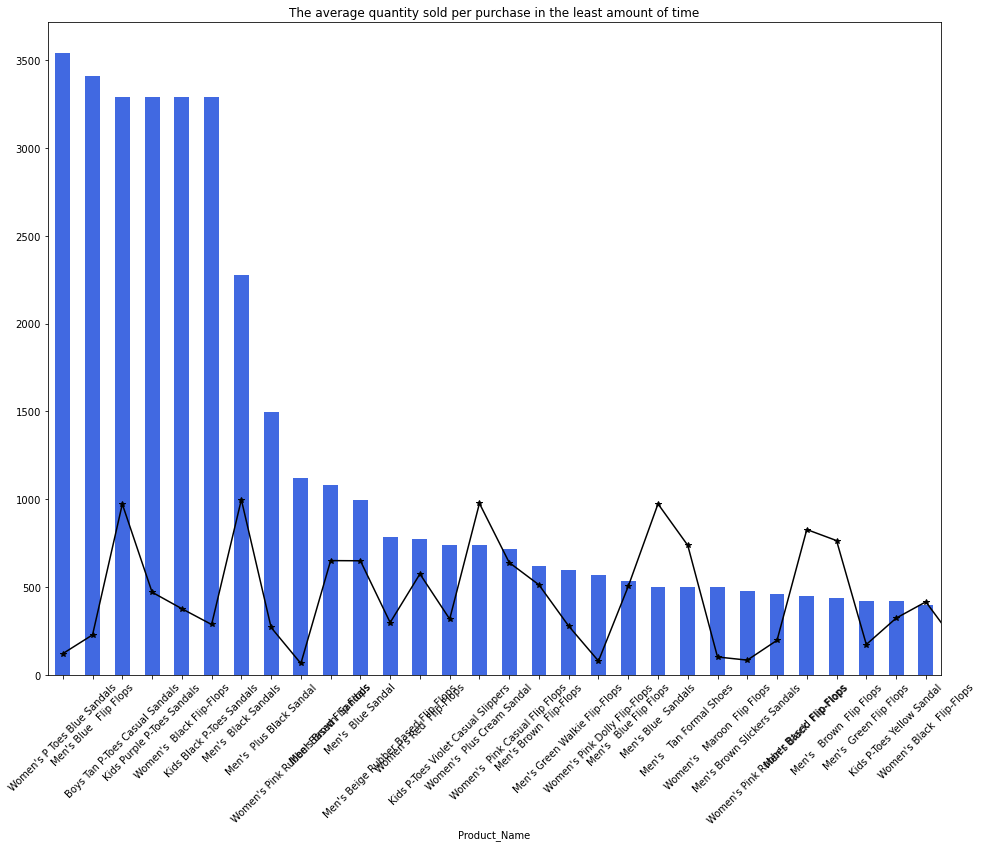

In [55]:
#will see which product sold the most in quantity versis session duration
plt.figure(figsize=(16,12))
Sales_data_copy.groupby('Product_Name').sum().sort_values(by="itemRevenue",ascending=False).head(30)["itemRevenue"].plot(kind = "bar",color='royalblue')
plt.title("The average quantity sold per purchase in the least amount of time")
plt.xticks(rotation=45)
Sales_data_copy['sessionDuration'].plot(kind='line', marker='*', color='black')
plt.xticks(rotation=45)
plt.show()

#### KPI Insight:

Women's P Toes Blue Sandals have the highest inventory turnover rate. This means every second on the website, this product sells the most and the quickest. 

### KPI #3 Website Conversion

What is the website conversion for every day of page visit

In [58]:
num_rows_transaction=Sales_data_copy[Sales_data_copy['itemQuantity']>0].shape[0]
num_rows_transaction

126

In [59]:
#If the transaction took place it is coded as 1, if no transaction took place it is coded as 0
Sales_data_copy['Transaction_or_not']=[1 if i>0 else 0 for i in Sales_data_copy['itemQuantity']]

In [60]:
Website_conversion_df=Sales_data_copy[['Transaction_or_not','sessions','pageViews']]

In [61]:
Website_conversion_df['Website_conversion_rate']=(Website_conversion_df['Transaction_or_not']/Website_conversion_df['sessions']*100)
Website_conversion_df['Website_conversion_rate'].head(5)

<ipython-input-61-4c6a19267cc3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: Website_conversion_rate, dtype: float64

<AxesSubplot:xlabel='Website_conversion_rate', ylabel='pageViews'>

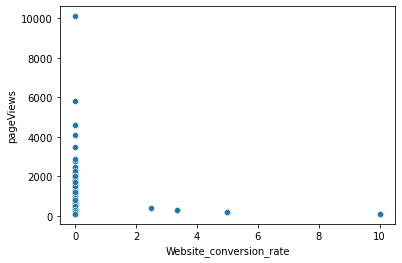

In [62]:
import seaborn as sns
sns.scatterplot(y=Website_conversion_df['pageViews'],x=Website_conversion_df['Website_conversion_rate'])

In [63]:
website_conversion_classification=Website_conversion_df.groupby('Transaction_or_not').sum()

In [64]:
website_conversion_classification.reset_index(inplace=True)

In [65]:
website_conversion_classification['Transaction_or_not']=website_conversion_classification['Transaction_or_not'].astype('str')
website_conversion_classification

,Transaction_or_not,sessions,pageViews,Website_conversion_rate
0,0,69650,696500,0.000000
1,1,1460,14600,1174.166667


Text(0.5, 1.0, 'pageViews vs transactions')

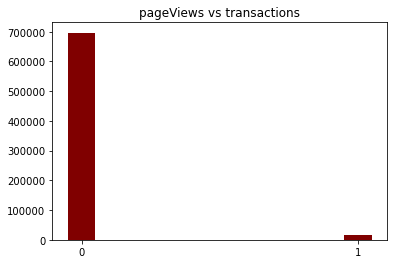

In [66]:
plt.bar(website_conversion_classification['Transaction_or_not'],website_conversion_classification['pageViews'], color ='maroon',width=0.1)
plt.title("pageViews vs transactions")

### KPI Insight
Website conversion rate is low, it is calculated as transactions per session. 

#### KPI #4 Discount target audience
From what demographic did we collect the most revenue through our discount strategy?

In [67]:
temp_categories_df.columns

Index(['Category', 'itemRevenue', 'itemQuantity', 'buyToDetailRate',
       'productAddsToCart', 'cartToDetailRate', 'uniquePurchases',
       'quantityAddedToCart', 'revenuePerItem', 'productRevenuePerPurchase',
       'itemsPerPurchase', 'productDetailViews', 'sessions', 'bounceRate',
       'pageViews', 'pageviewsPerSession', 'sessionDuration', 'users',
       'newUsers'],
      dtype='object')

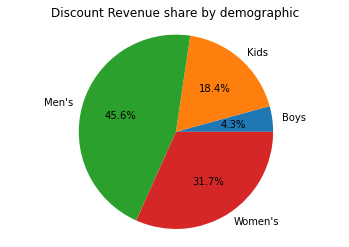

In [68]:
temp_categories_df
y=temp_categories_df['productRevenuePerPurchase']
label=temp_categories_df['Category']
plt.pie(y,labels=label,autopct='%1.1f%%')
plt.title('Discount Revenue share by demographic')
plt.axis('equal')
plt.show()


##### KPI Insight
Men's products are the best performing targets for discount schemes. Boys products seem inelastic to discounts.There needs to be further investigation on channels of marketing, inventory status of Boys products 

##### KPI #5 Product most likely to be bought in bulk
Which product has more than one units added in the cart at once 

In [71]:
Sales_data_quantity=[Sales_data_copy['quantityAddedToCart'].sort_values(ascending=False)]

In [74]:
Sales_data_copy.columns

Index(['Product_Name', 'Date', 'itemRevenue', 'itemQuantity',
       'buyToDetailRate', 'productAddsToCart', 'cartToDetailRate',
       'uniquePurchases', 'quantityAddedToCart', 'revenuePerItem',
       'productRevenuePerPurchase', 'itemsPerPurchase', 'productDetailViews',
       'sessions', 'bounceRate', 'pageViews', 'pageviewsPerSession',
       'sessionDuration', 'users', 'newUsers', 'Category_split', 'Category',
       'Product_Category', 'Transaction_or_not'],
      dtype='object')

In [86]:
Sales_item_quantity=pd.DataFrame(Sales_data_copy.sort_values(by='quantityAddedToCart',ascending=False).head(10))

Text(0, 0.5, 'Units')

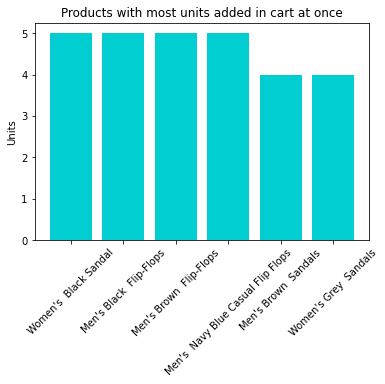

In [93]:
plt.bar(Sales_item_quantity['Product_Name'],Sales_item_quantity['quantityAddedToCart'],color='darkturquoise')
plt.xticks(rotation=45)
plt.title("Products with most units added in cart at once")
plt.ylabel("Units")

#### KPI Insight
Women's Black Sandals to Women's Grey Sandals shown in the graph above have 4-5 quanitities added in the cart at once in case of some orders.
Bulk buying of products can be targeted towards, and/or could have an existing userbase of small business/corporate buyers. A seperate landing page for bulk buying should be set up to work efficiently. 

However, intent to buy more than 1 units of the same product could also mean our free returns policy is but exchange might not be readily available. This happens when customers are not sure which size to buy

##### KPI #6 New User Metrics

1.What items are new Users purchasing

2.what items did they buy after viewing product details

3.what items did they view the details about and added them to the cart

4.did they purchase more than two types of products?

In [111]:
#subsetting the dataframe with New Users not euqal to 0
New_Users_revenue_df=Sales_data_copy[Sales_data_copy['newUsers']>0]
New_Users_revenue=New_Users_revenue_df.groupby('Product_Name').sum()
New_Users_revenue.reset_index(inplace=True)

In [123]:
#What item grossed  the highest amongst  new users purchases
New_Users_revenue_0=New_Users_revenue[['Product_Name','itemRevenue','newUsers']]
new_item_revenue=pd.DataFrame(New_Users_revenue_0.sort_values(by='itemRevenue',ascending=False).head(5))

#What items were purchased after viewing product details
New_Users_unique=New_Users_revenue[['Product_Name','buyToDetailRate','newUsers']]
new_item_unique=pd.DataFrame(New_Users_unique.sort_values(by='buyToDetailRate',ascending=False).head(5))

#What items were added to the cart after viewing product details
New_Users_carts=New_Users_revenue[['Product_Name','cartToDetailRate','newUsers']]
new_item_cart=pd.DataFrame(New_Users_carts.sort_values(by='cartToDetailRate',ascending=False).head(5))

#Different tyes of products brought by first time users 
New_Users_revenue_sets=New_Users_revenue_df.groupby('uniquePurchases').sum()
New_Users_revenue_sets.reset_index(inplace=True)

In [148]:
New_Users_revenue_sets.iloc[:,[0,-2]]

,uniquePurchases,newUsers
0,0,3400
1,1,48
2,2,13
3,3,4
4,4,2


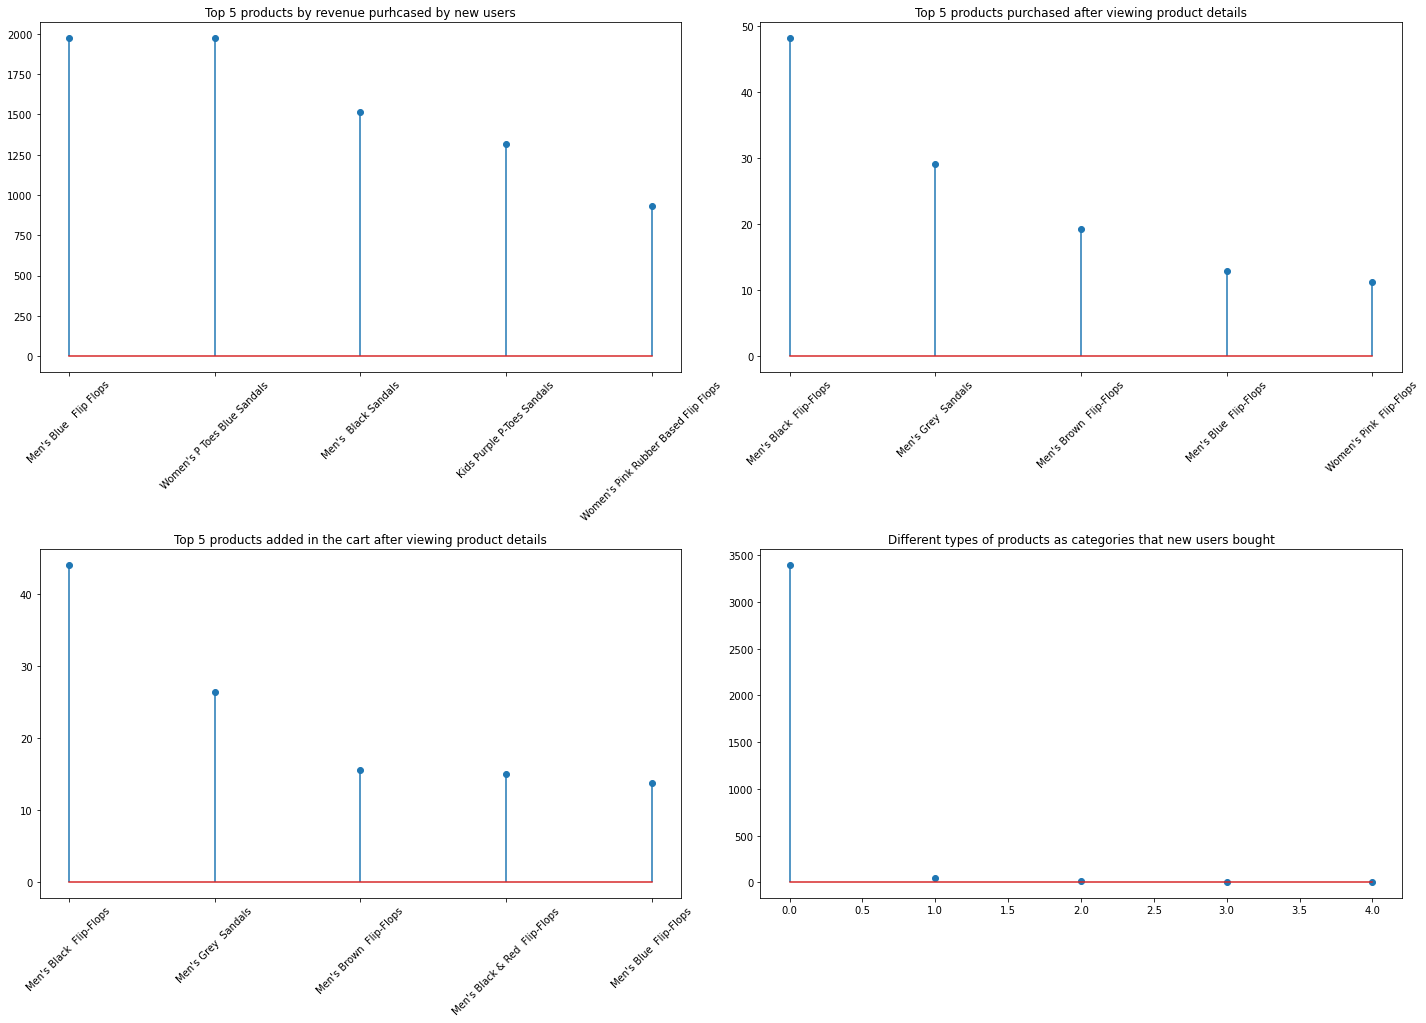

In [149]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.stem(new_item_revenue['Product_Name'],new_item_revenue['itemRevenue'])
plt.title("Top 5 products by revenue purhcased by new users")
plt.xticks(rotation=45)
plt.subplot(3,2,2)
plt.stem(new_item_unique['Product_Name'],new_item_unique['buyToDetailRate'])
plt.xticks(rotation=45)
plt.title("Top 5 products purchased after viewing product details")
plt.subplot(3,2,3)
plt.title("Top 5 products added in the cart after viewing product details")
plt.stem(new_item_cart['Product_Name'],new_item_cart['cartToDetailRate'])
plt.xticks(rotation=45)
plt.subplot(3,2,4)
plt.stem(New_Users_revenue_sets['uniquePurchases'],New_Users_revenue_sets['newUsers'])
plt.title("Different types of products as categories that new users bought")
plt.tight_layout()


#### KPI Insight

1.What items are new Users purchasing
Men's Blue Flip Flops are the highest grossing amongst first time users which means an ad placed on marketing channels had a direct impact on new customer acquisition

2.what items did they buy after viewing product details
Men's Black Flip Flops unlike blue flip flops are checked for details before a purchase. This could reflect on customers' priority of making sure the durability, quality are up to mark

3.what items did they view the details about and added them to the cart
There are more color choices in cart adds after viewing product details as opposed to buying after adding to cart. This indicates that customers could have just been adding different options to cart and later eliminated the products they chose against before buying

4.did they purchase more than two types of products?
Most first time customers did not buy any products, but a few bought 2 different types of products on visiting the website for the first time. Marketing the broad range of products should be focussed on to improve this number


### Hypothesis: Cart Abandonment decreases as session duration increases

Cart Abandonment means adding products to cart but not purchasing them

Note: Hypothesis testing with statistcial methods is not required for this metric as the overview  would be sufficed by a histogram

In [150]:
#If item was added to cart (times added>0) it is coded as 1, if item was not added it is coded as 0
Sales_data_copy['Cart_or_not']=[1 if i>0 else 0 for i in Sales_data_copy['productAddsToCart']]

In [152]:
Sales_data_copy['Cart_or_not'].head()

0    0
1    1
2    1
3    1
4    1
Name: Cart_or_not, dtype: int64

If the Cart was abandoned, that is no transaction happened after adding the product to the cart then we code the value to 0 

In [160]:
Sales_data_copy['Cart_Abandonment_bool'] = Sales_data_copy.apply(lambda row: row.Transaction_or_not>0 and
                                 row.Cart_or_not>0 , axis = 1)
  

In [162]:
Sales_data_copy['Cart_Abandonment_bool'].head()

0    False
1     True
2     True
3     True
4     True
Name: Cart_Abandonment_bool, dtype: bool

In [171]:
Sales_data_copy['Cart_Abandonment']=Sales_data_copy['Cart_Abandonment']=[1 if i==True else 0 for i in Sales_data_copy['Cart_Abandonment_bool']]

In [172]:
Sales_data_copy['Cart_Abandonment'].head()

0    0
1    1
2    1
3    1
4    1
Name: Cart_Abandonment, dtype: int64

Text(0.5, 1.0, 'Abandonment of cart as the session duration increases')

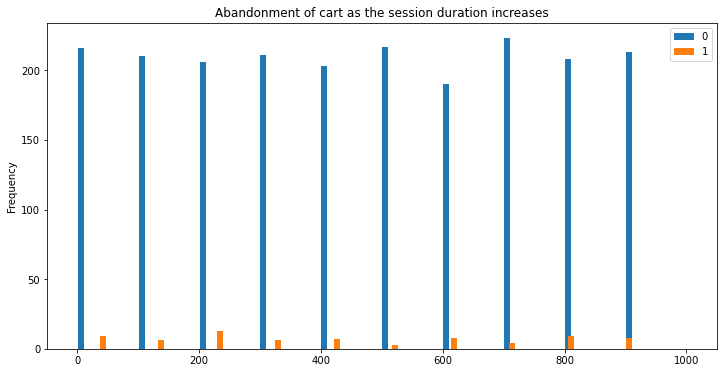

In [174]:
group_session = Sales_data_copy.groupby('Cart_Abandonment')['sessionDuration'] # group values by carrier, select minutes delayed
group_session.plot(kind='hist', figsize=[12,6], width=10, legend=True) # alpha for transparency
plt.title('Abandonment of cart as the session duration increases')

Insight
Even if the customers are staying for more time during each session on the website, the cart abandonment did not decrease overall. If the customer stays around 5 mins, they are carry out a transaction and abandonment increases after 5 minutes (300 second)

### Further Analysis possibility:
If the cost for each item is also provided, profit margin, cost of customer acquisition could be determined.

Marketing channels could be scrutinised for measuring  traffic through clicks as word of mouth is hard to track

Customer IDs could help segment customers based on purchasing behavior